# <div style="background-color:#333;color:#fff;border-radius:20px;padding:15px;text-align:center;margin:0"> DCA | volve data</div>

In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [88]:
# load the data 
df = pd.read_excel("../data/Volve production data.xlsx")

In [89]:
df.head() 

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


## <span style="font-weight:900;font-color:#333"> Smoothing the data 

In [90]:
# filter the data for only one well 
df = df[ df["NPD_WELL_BORE_NAME"]=="15/9-F-14"]
df = df [df["BORE_OIL_VOL"] !=0]
df.head() 

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
5118,2008-07-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,260.866875,...,%,100.714919,52.381899,69.539413,1735.26,252235.23,4.00,NaN,production,OP
5119,2008-07-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,5.57,256.248230,...,%,99.598318,71.115352,68.016167,592.36,88949.00,1.37,NaN,production,OP
5120,2008-07-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,254.982785,...,%,98.649941,67.590753,66.948884,2532.21,373786.28,5.84,NaN,production,OP
5121,2008-07-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,251.475921,...,%,95.658734,73.782251,63.663812,3030.71,447840.09,9.13,NaN,production,OP
5122,2008-07-17,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,249.346191,...,%,93.585252,78.035440,61.337700,3288.08,474614.43,7.58,NaN,production,OP


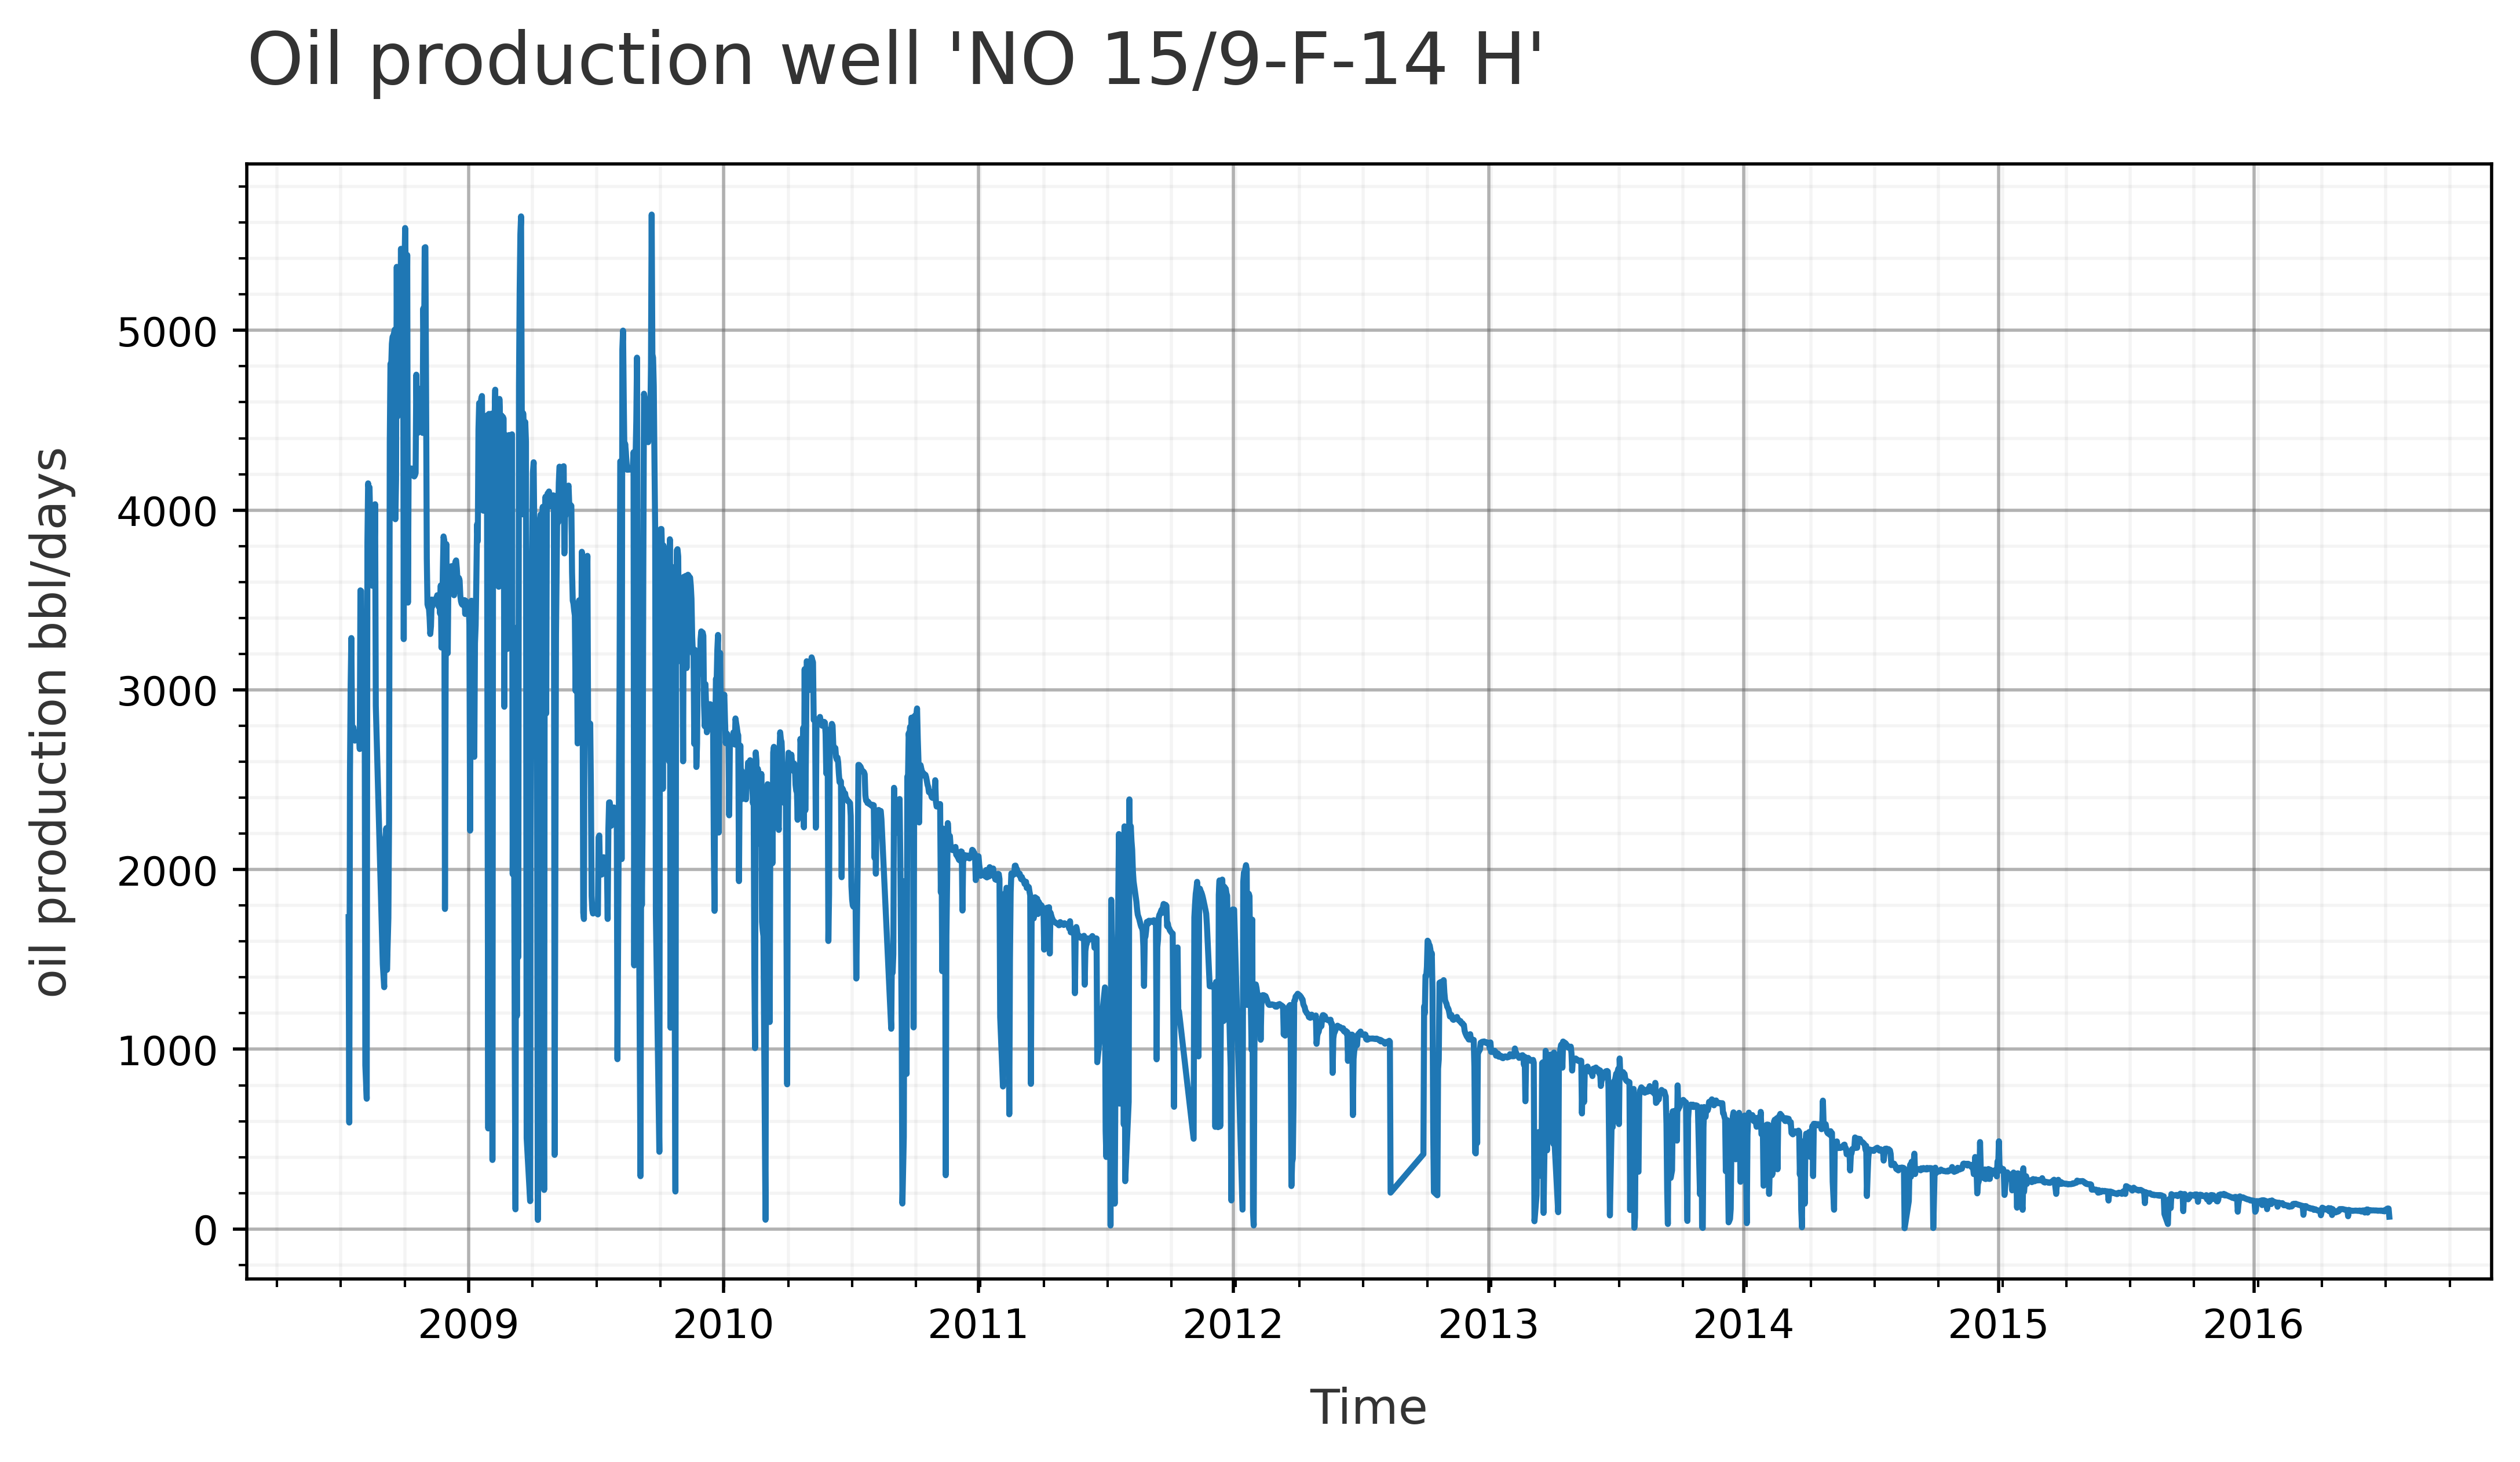

In [91]:

plt.figure(figsize=(10,5),dpi=500)
plt.plot(df["DATEPRD"],df["BORE_OIL_VOL"])
# figure title 
plt.title("Oil production well 'NO 15/9-F-14 H' ",fontsize=18,color="#333",loc="left",pad=20)
# xlabel 
plt.xlabel("Time",labelpad=10,loc="center",fontsize=12,color="#333")
# ylabel
plt.ylabel("oil production bbl/days",labelpad=10,loc="center",color="#333",fontsize=12)
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

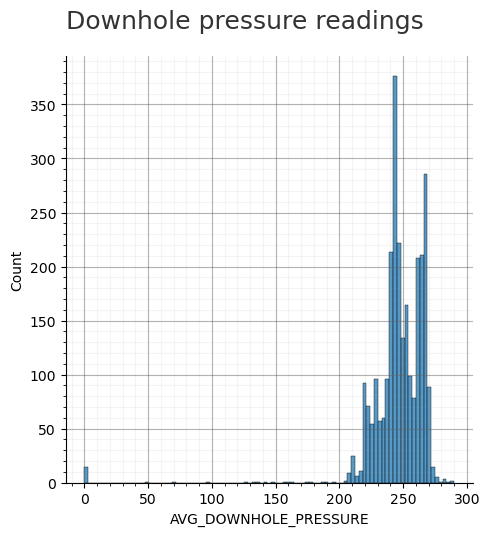

In [92]:
sns.displot(data=df,x="AVG_DOWNHOLE_PRESSURE")
# figure title 
plt.title("Downhole pressure readings",fontsize=18,color="#333",loc="left",pad=20)
# ylabel
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

C:\Users\ae504\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BORE_OIL_VOL'>

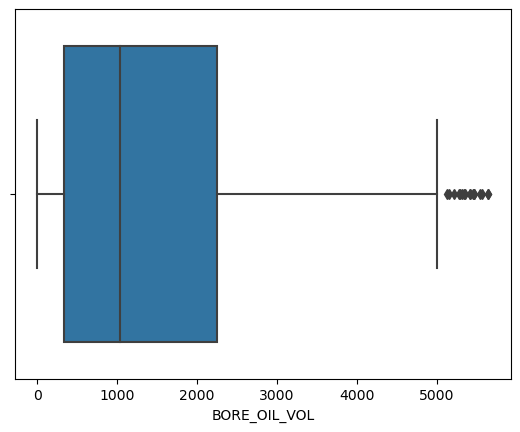

In [93]:
sns.boxplot(df["BORE_OIL_VOL"])

In [94]:
df["BORE_OIL_VOL"+'_rol_Av']=df["BORE_OIL_VOL"].rolling(window=100,center=True).mean()
df["BORE_OIL_VOL"+'_rol_Std']=df["BORE_OIL_VOL"].rolling(window=100,center=True).std() 

In [95]:
df.head() 

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE,BORE_OIL_VOL_rol_Av,BORE_OIL_VOL_rol_Std
5118,2008-07-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,260.866875,...,52.381899,69.539413,1735.26,252235.23,4.00,NaN,production,OP,NaN,NaN
5119,2008-07-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,5.57,256.248230,...,71.115352,68.016167,592.36,88949.00,1.37,NaN,production,OP,NaN,NaN
5120,2008-07-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,254.982785,...,67.590753,66.948884,2532.21,373786.28,5.84,NaN,production,OP,NaN,NaN
5121,2008-07-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,251.475921,...,73.782251,63.663812,3030.71,447840.09,9.13,NaN,production,OP,NaN,NaN
5122,2008-07-17,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,249.346191,...,78.035440,61.337700,3288.08,474614.43,7.58,NaN,production,OP,NaN,NaN


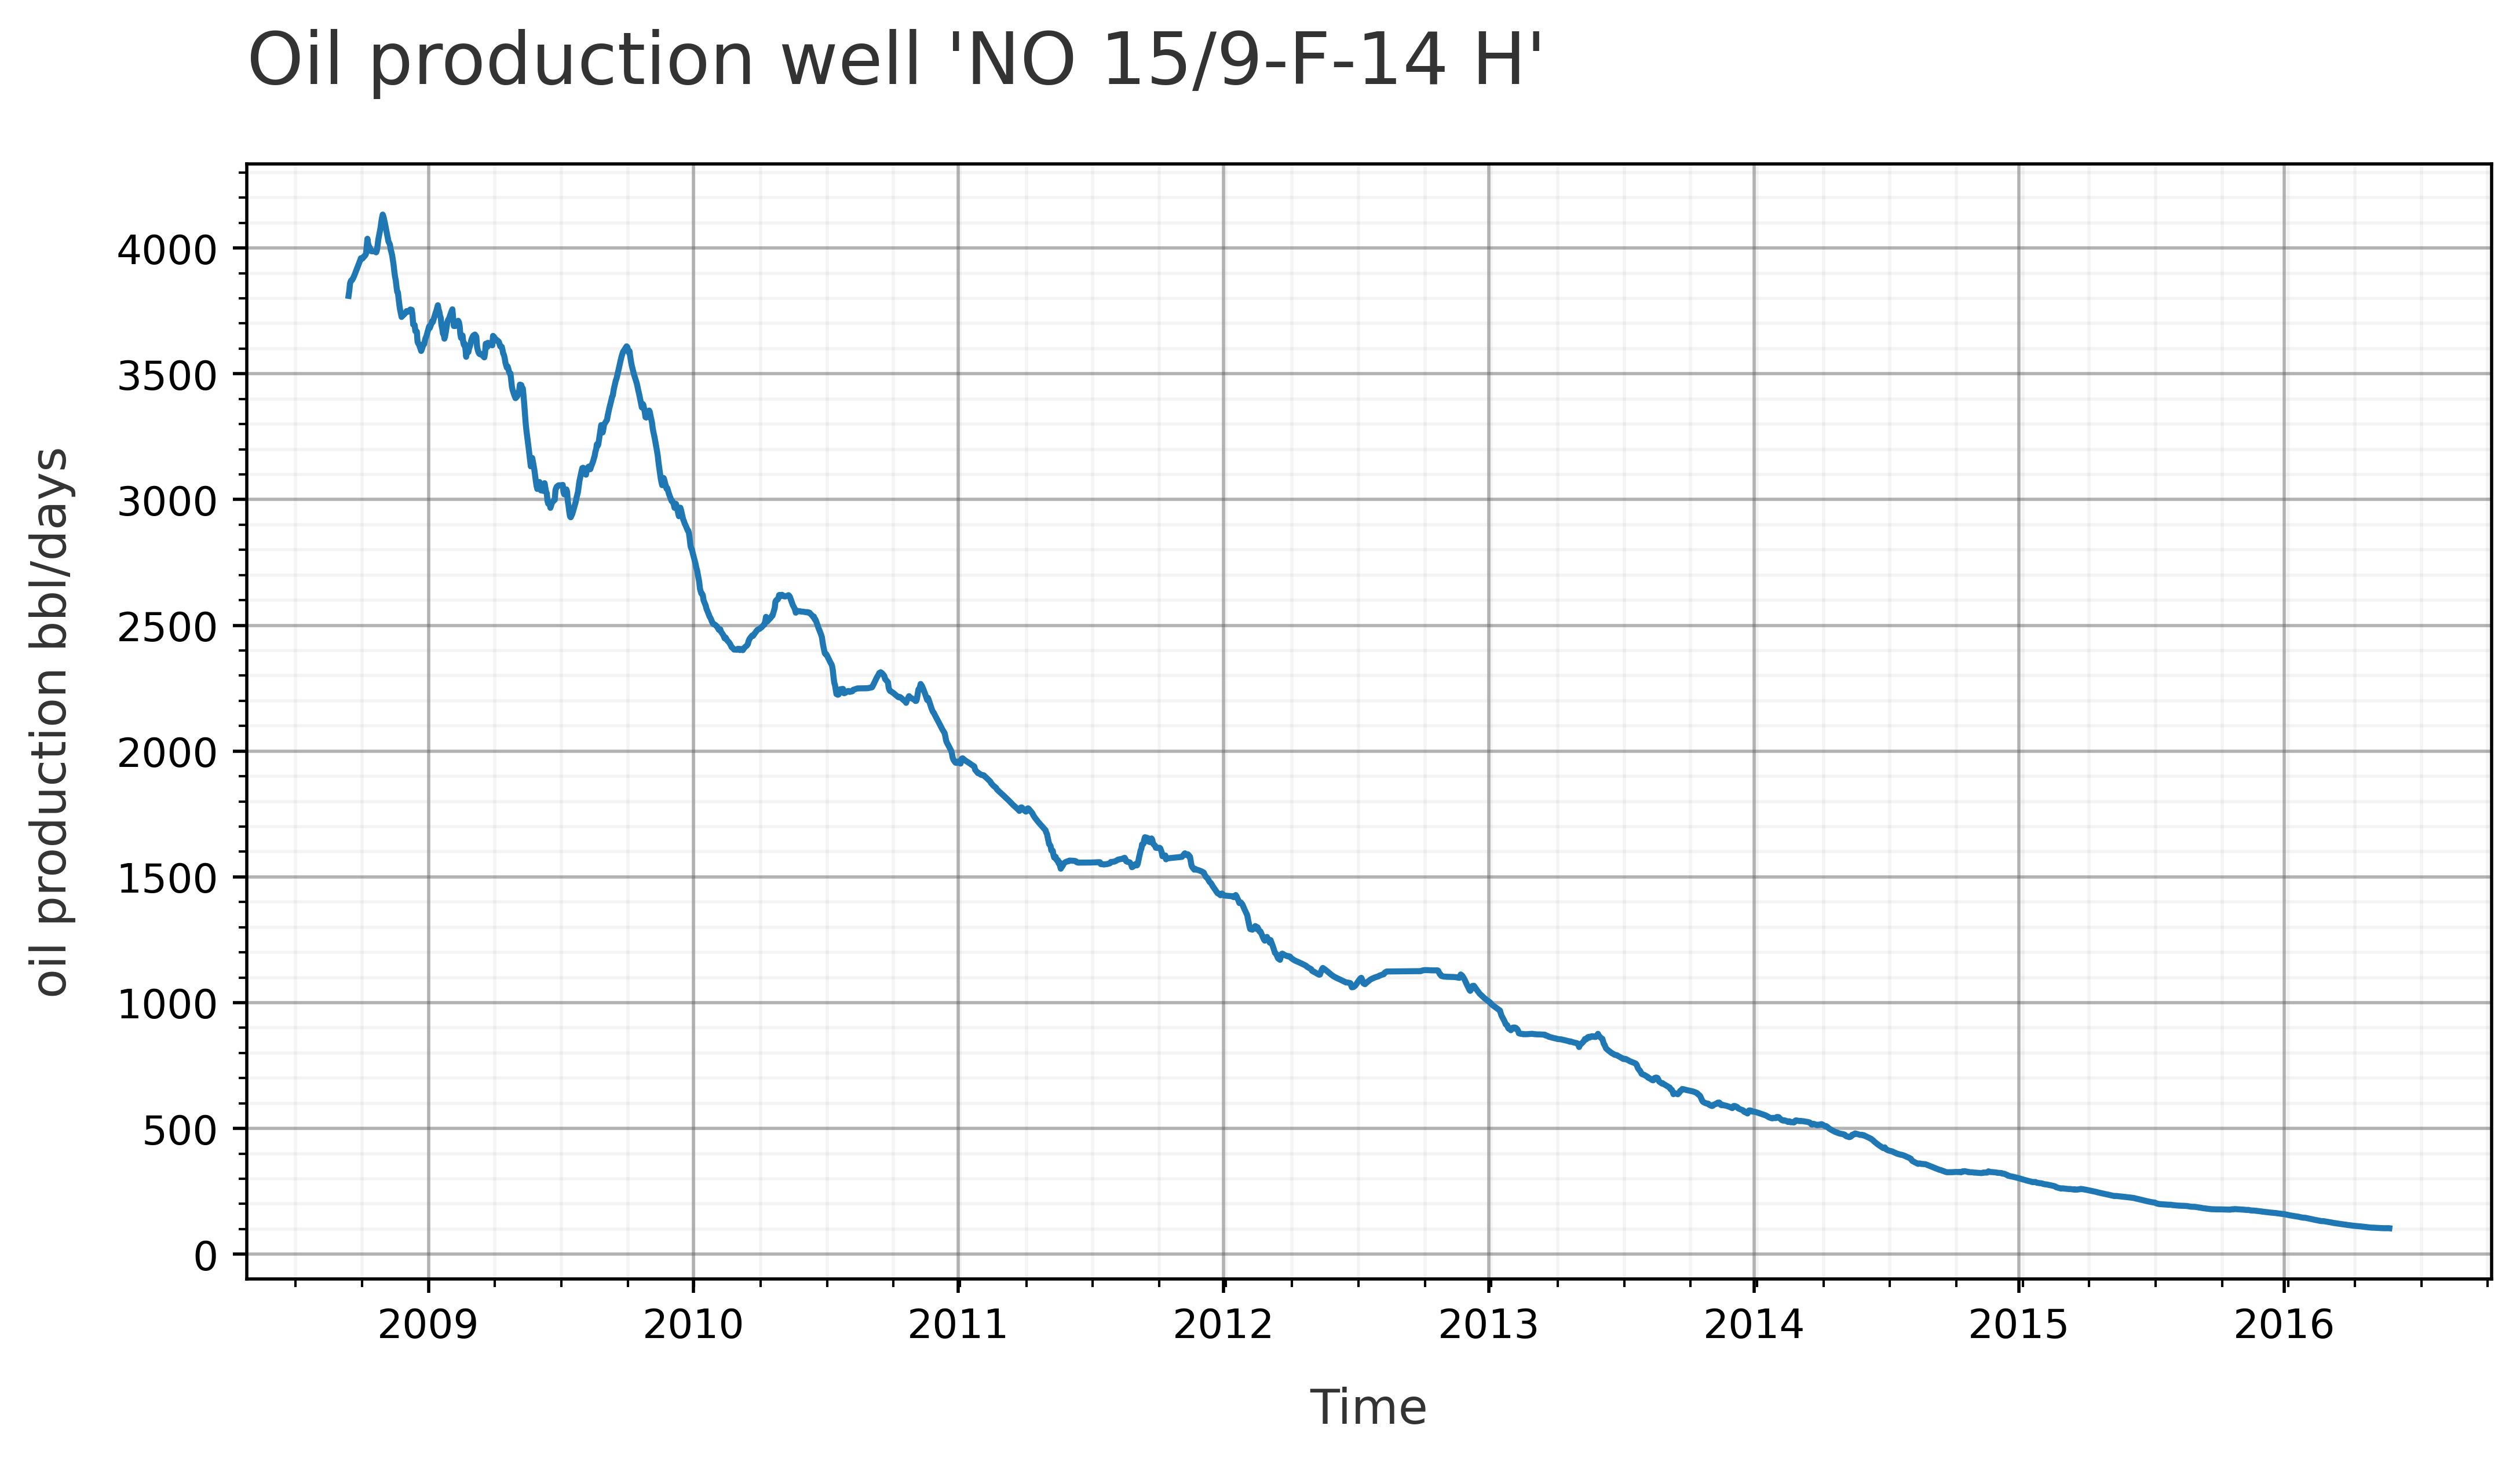

In [96]:
plt.figure(figsize=(10,5),dpi=500)
plt.plot(df["DATEPRD"],df["BORE_OIL_VOL_rol_Av"]) 
# figure title 
plt.title("Oil production well 'NO 15/9-F-14 H' ",fontsize=18,color="#333",loc="left",pad=20)
# xlabel 
plt.xlabel("Time",labelpad=10,loc="center",fontsize=12,color="#333")
# ylabel
plt.ylabel("oil production bbl/days",labelpad=10,loc="center",color="#333",fontsize=12)
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

## <span style="font-weight:900;font-color:#333"> Date column

In [101]:
d = df[["DATEPRD","BORE_OIL_VOL_rol_Av"]].dropna() 
d 

,DATEPRD,BORE_OIL_VOL_rol_Av
5179,2008-09-13,3809.6498
5180,2008-09-14,3829.6124
5181,2008-09-15,3858.4468
5182,2008-09-16,3867.7339
5183,2008-09-17,3872.0095
...,...,...
7903,2016-05-21,103.2273
7904,2016-05-22,103.3252
7905,2016-05-23,103.3933
7906,2016-05-24,103.5048


In [102]:
d["DATEPRD"]

5179   2008-09-13
5180   2008-09-14
5181   2008-09-15
5182   2008-09-16
5183   2008-09-17
          ...    
7903   2016-05-21
7904   2016-05-22
7905   2016-05-23
7906   2016-05-24
7907   2016-05-25
Name: DATEPRD, Length: 2624, dtype: datetime64[ns]

In [103]:
# the start data
d["DATEPRD"].min() 

Timestamp('2008-09-13 00:00:00')

In [104]:
d["DATEPRD"].max() 

Timestamp('2016-05-25 00:00:00')

In [105]:
# make day column 
d["days"]= (d["DATEPRD"] -d["DATEPRD"].min() ).dt.days 

In [106]:
d 

,DATEPRD,BORE_OIL_VOL_rol_Av,days
5179,2008-09-13,3809.6498,0
5180,2008-09-14,3829.6124,1
5181,2008-09-15,3858.4468,2
5182,2008-09-16,3867.7339,3
5183,2008-09-17,3872.0095,4
...,...,...,...
7903,2016-05-21,103.2273,2807
7904,2016-05-22,103.3252,2808
7905,2016-05-23,103.3933,2809
7906,2016-05-24,103.5048,2810


In [107]:
t = d["days"]
Q = d["BORE_OIL_VOL_rol_Av"] 

In [108]:
Q 

5179    3809.6498
5180    3829.6124
5181    3858.4468
5182    3867.7339
5183    3872.0095
          ...    
7903     103.2273
7904     103.3252
7905     103.3933
7906     103.5048
7907     103.1613
Name: BORE_OIL_VOL_rol_Av, Length: 2624, dtype: float64

In [109]:
# normalize the time and rate data
t_normalized = t / max(t)
q_normalized = Q / max(Q)  


In [110]:
def hyperbolic(t, qi, di, b):
      return qi / (np.abs((1 + b * di * t))**(1/b))

In [111]:
from scipy.optimize import curve_fit

In [112]:
 # fitting the data with the hyperbolic function
popt, pcov = curve_fit(hyperbolic, t_normalized, q_normalized)
qi, di, b = popt

qi = qi * max(Q)
di = di / max(t)

In [113]:
qi, di, b 

(4072.613253642711, 0.0007447979373347065, -0.3385530436211488)

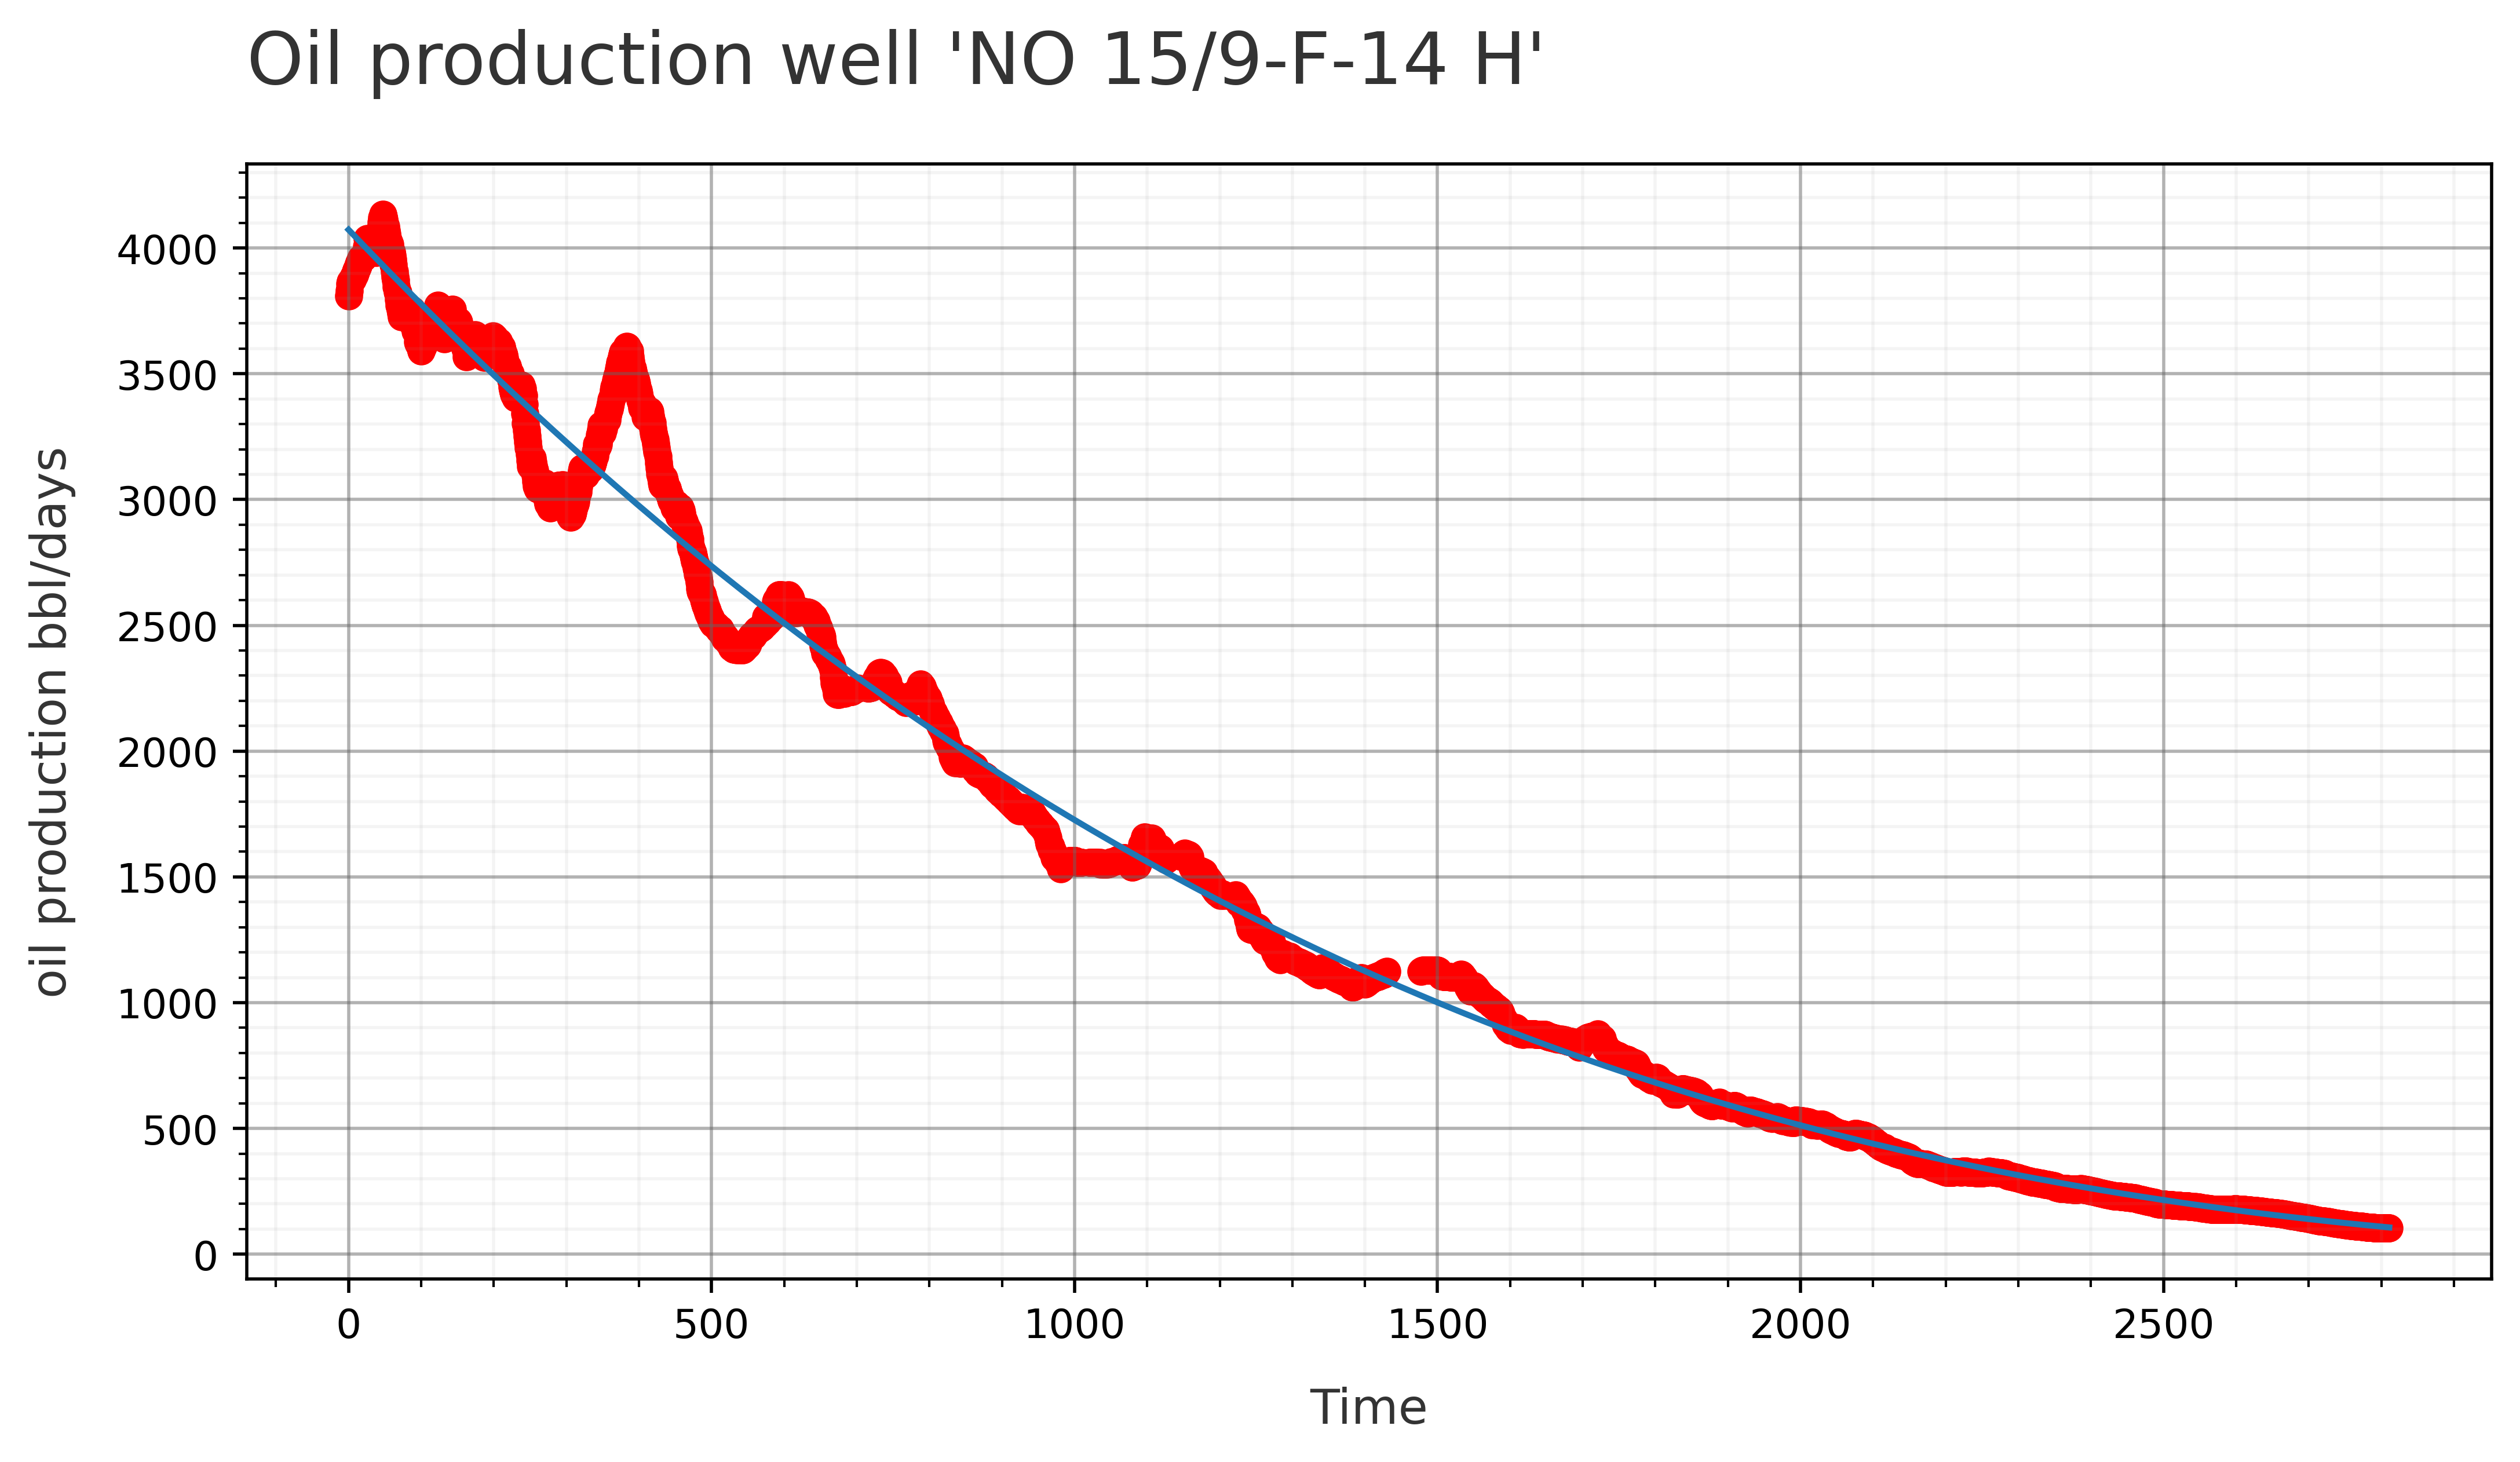

In [115]:
plt.figure(figsize=(10,5),dpi=500)
plt.scatter(t,Q,color="red",label="smoothed-data")
tfit = np.linspace(min(t), max(t), 100)
qfit = hyperbolic(tfit, qi, di, b)
plt.plot(tfit,qfit,label="fitted-line")
plt.title("Oil production well 'NO 15/9-F-14 H' ",fontsize=18,color="#333",loc="left",pad=20)
# xlabel 
plt.xlabel("Time",labelpad=10,loc="center",fontsize=12,color="#333")
# ylabel
plt.ylabel("oil production bbl/days",labelpad=10,loc="center",color="#333",fontsize=12)
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

## <span style="font-weight:900;font-color:#333"> Using ready module

In [28]:
from dca_oop import ARPS

In [29]:
df_well_1 = df[ df["NPD_WELL_BORE_NAME"]=="15/9-F-14"]

In [77]:
arps = ARPS(df_well_1,"BORE_GAS_VOL","DATEPRD")

In [78]:
# smoothing the data 
df_smoothed = arps.smooth(100,3,True)

D:\college\student chapter\SPE\Technical manager\python for O&G course\DCA module\dca_oop.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.q + '_rol_Av'] = self.df[self.q].rolling(window=window_size, center=True).mean()
D:\college\student chapter\SPE\Technical manager\python for O&G course\DCA module\dca_oop.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.q + '_rol_Std'] = self.df[self.q].rolling(window=window_size, center=True).std()
D:\college\student chapter\SPE\Technic

In [79]:
df_smoothed

,DATEPRD,BORE_GAS_VOL,BORE_GAS_VOL_rol_Av,BORE_GAS_VOL_rol_Std,BORE_GAS_VOL_is_Outlier
0,2008-12-20,516367.93,519595.2984,104245.476587,False
1,2008-12-21,508709.44,518475.5287,102034.251627,False
2,2008-12-22,506383.06,517243.4327,101113.891646,False
3,2008-12-23,505086.11,518531.7353,102107.682259,False
4,2008-12-24,507980.35,519754.3969,102699.011555,False
...,...,...,...,...,...
2464,2016-05-21,15979.29,16657.9586,1502.637829,False
2465,2016-05-22,16108.07,16677.0409,1517.082755,False
2466,2016-05-23,16190.44,16688.8357,1522.621721,False
2467,2016-05-24,16300.54,16706.2389,1533.849177,False


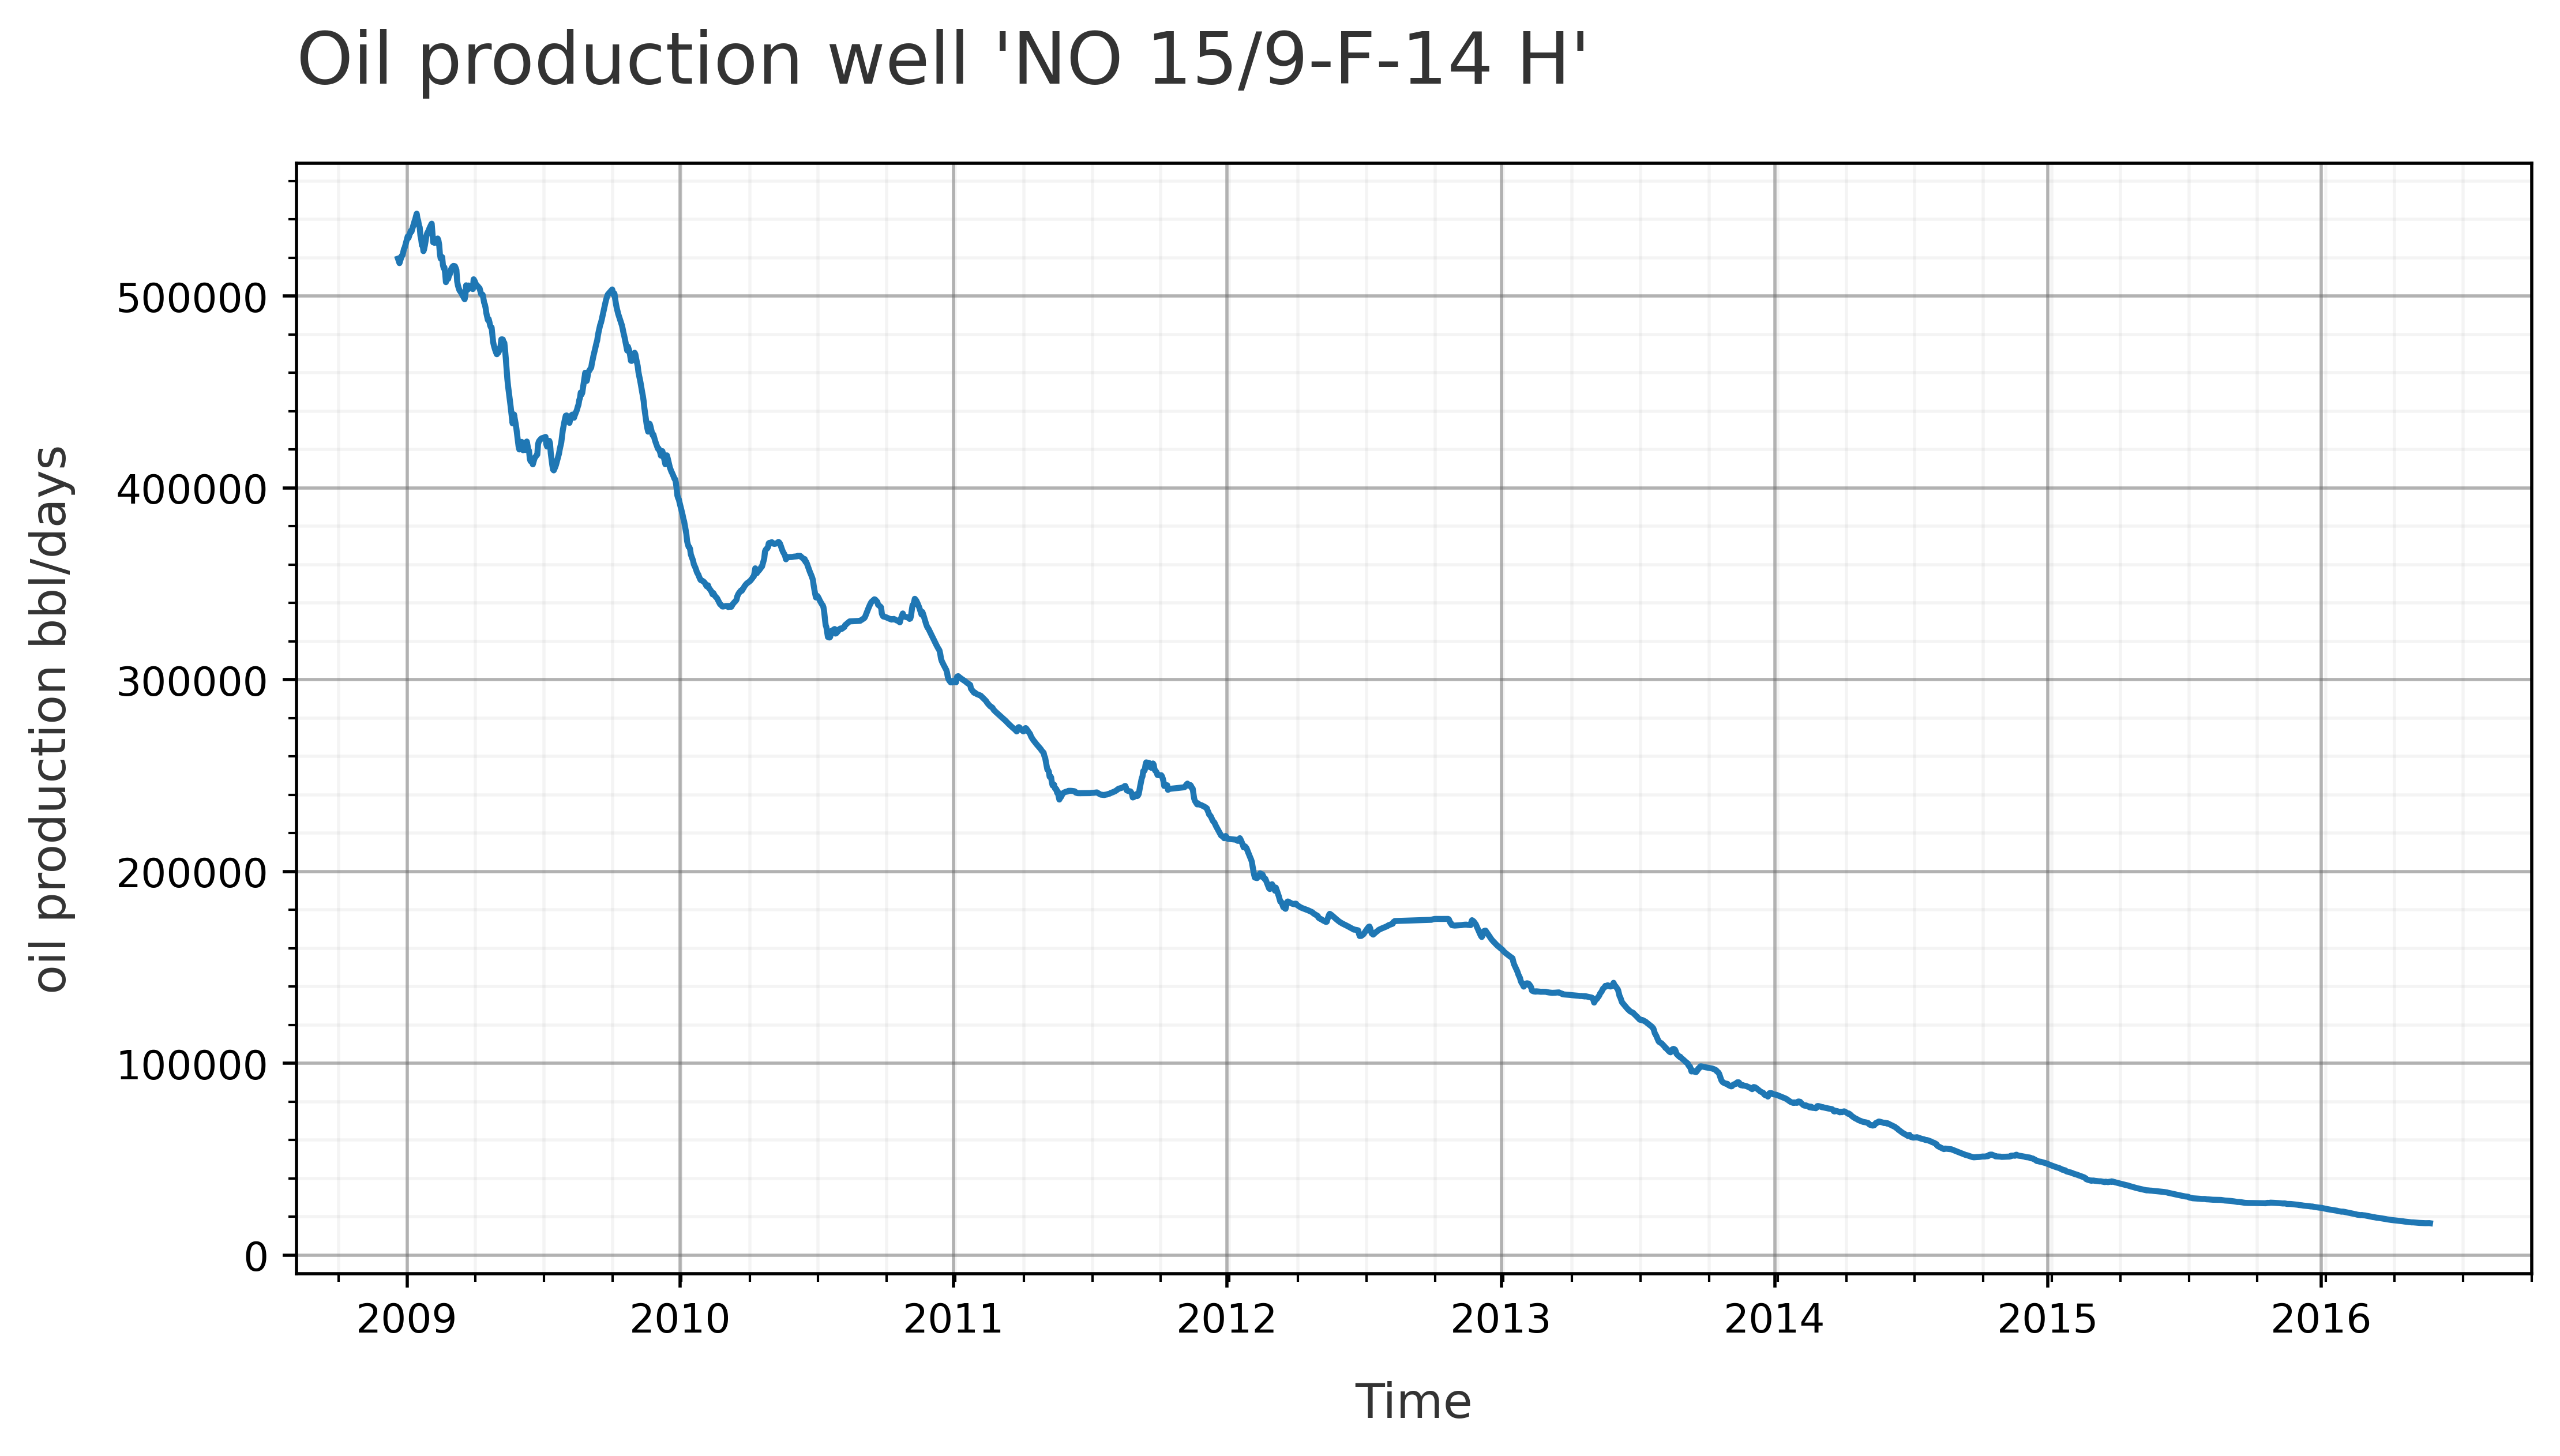

In [81]:
plt.figure(figsize=(10,5),dpi=500)
plt.plot(df_smoothed["DATEPRD"],df_smoothed["BORE_GAS_VOL_rol_Av"])
# figure title 
plt.title("Oil production well 'NO 15/9-F-14 H' ",fontsize=18,color="#333",loc="left",pad=20)
# xlabel 
plt.xlabel("Time",labelpad=10,loc="center",fontsize=12,color="#333")
# ylabel
plt.ylabel("oil production bbl/days",labelpad=10,loc="center",color="#333",fontsize=12)
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

In [82]:
# process the date column
arps.prepocess_date_col()
# apply the parameter
params, Qs = arps.fit_hyperbolic()

In [83]:
Qs 

0       524579.988113
1       524228.746311
2       523877.635915
3       523526.656914
4       523175.809298
            ...      
2464     13561.134063
2465     13515.580255
2466     13470.112049
2467     13424.729411
2468     13379.432308
Name: Time [{frequency}], Length: 2469, dtype: float64

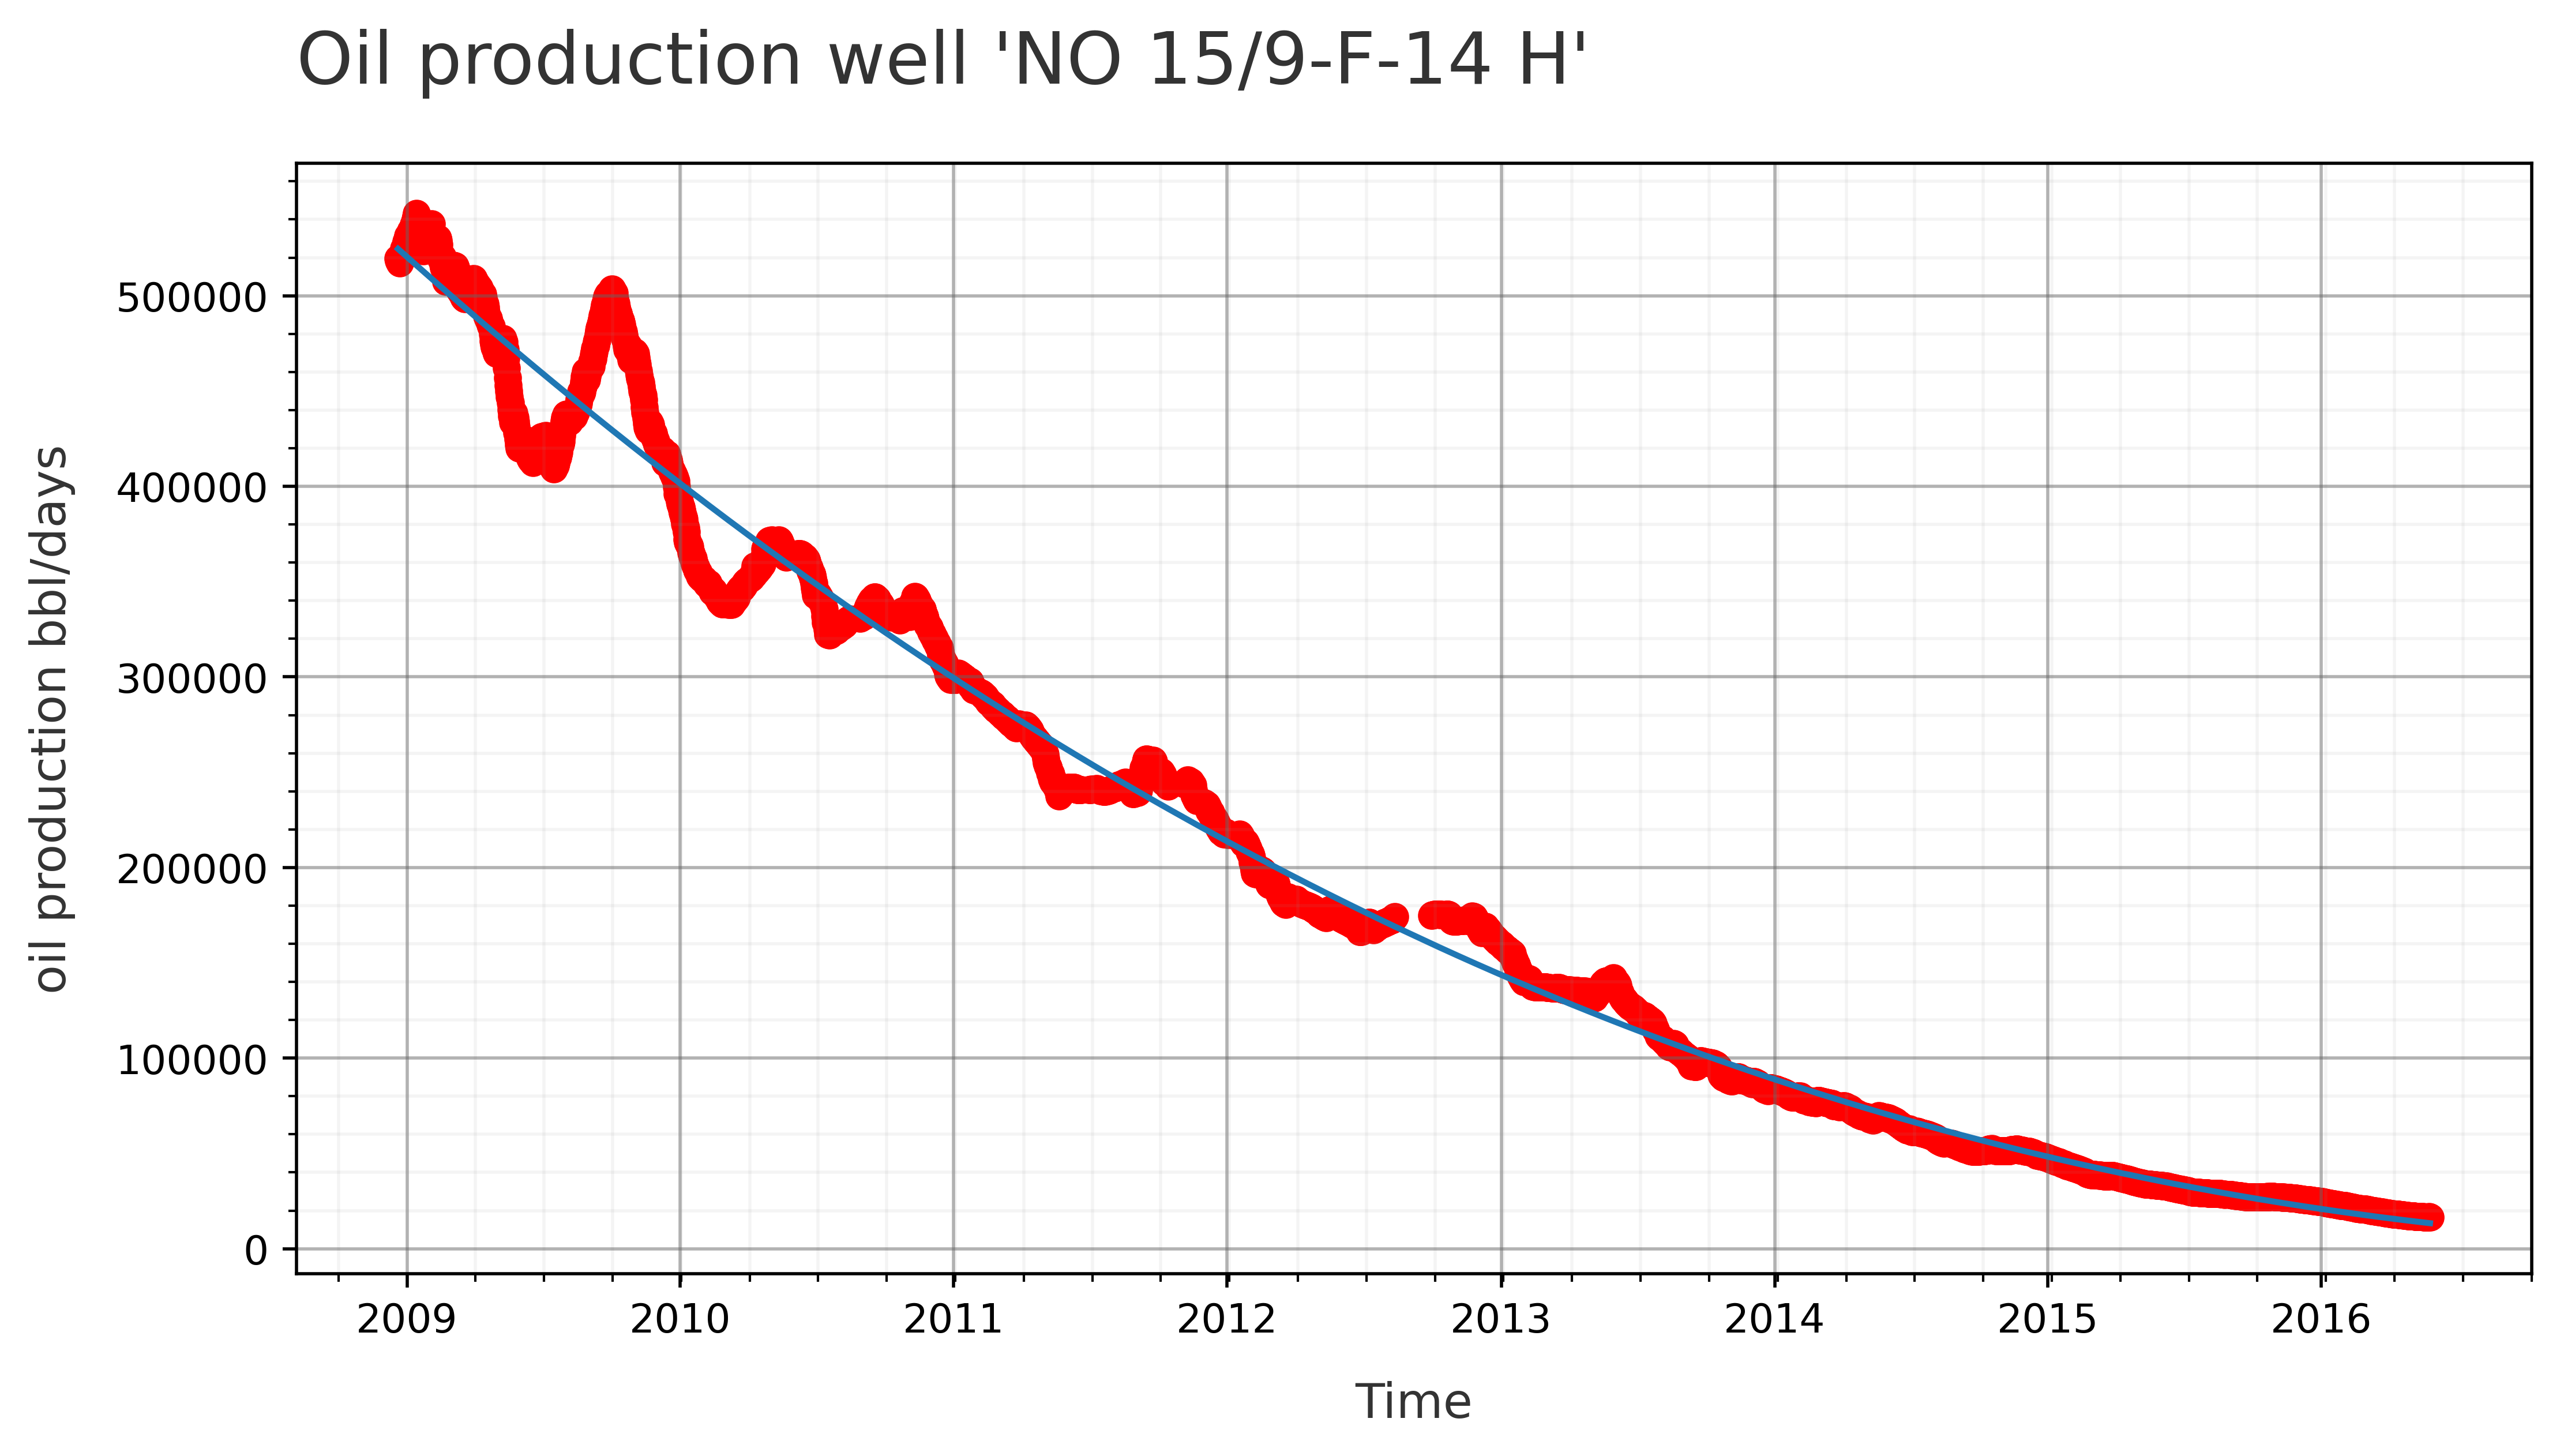

In [85]:
plt.figure(figsize=(10,5),dpi=500)
plt.scatter(df_smoothed["DATEPRD"],df_smoothed["BORE_GAS_VOL_rol_Av"],color="red",label="Smoothed data")
plt.plot(df_smoothed["DATEPRD"],Qs,label="Hyperbolic-line")
# figure title 
plt.title("Oil production well 'NO 15/9-F-14 H' ",fontsize=18,color="#333",loc="left",pad=20)
# xlabel 
plt.xlabel("Time",labelpad=10,loc="center",fontsize=12,color="#333")
# ylabel
plt.ylabel("oil production bbl/days",labelpad=10,loc="center",color="#333",fontsize=12)
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

In [86]:
params

[524579.9881131018,
 0.0006696929285838359,
 -0.44141983957137443,
 4.770199707003276e-05,
 'hp']